<a href="https://colab.research.google.com/github/Loubna-saadi/Embeddings/blob/main/Embeddings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Étape 1 : Enregistrement du texte


In [ ]:
diamond_text = """
Le dyamond est l'une des substances naturelles les plus dures connu de l'homme. Il est formé à partir de carbone pur, cristalisé sous une pression et une temperature extrême au sein du manteau terrestre.

Il existe plusieurs type de diamants, classé selon leur couleur, pureté, taille et forme. Les diamants incolores sont les plus rares et les plus valorisé sur le marché. Cepandant, les diamants coloré, comme les diamants bleus ou roses, sont aussi trés recherché.

La valeur d'un dyamond dépend principalement des quatres C : Carat, Cut (taille), Clarity (pureté) et Color (couleur). Un petit diamant parfaitement taillé peut avoir plus de valeur qu’un gros diamant impur ou mal coupé.

Outre leurs utilisations dans la joaillerie, les diamants sont aussi employé dans des domaines industriels. Grâce à leur dureté, ils sont utilisé pour couper, polir ou percer d'autres matériaux très résistants.

Les dyamants synthétique, produit en laboratoire, sont devenus courant ces derniéres années. Bien qu'ils soient chimikement identique aux diamants naturels, leur valeur commerciale est souvent inférieur.

En résumé, les diamants sont des gemmes fascinantes, aussi bien pour leur beauté que pour leur complexité chimique et industrielle.
"""

with open("mytextdata.txt", "w", encoding="utf-8") as f:
    f.write(diamond_text)

# Étape 2 : Lecture + prétraitement

In [ ]:
import re

with open("mytextdata.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Nettoyage
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
tokens = text.split()

print("Aperçu des premiers mots:", tokens[:10])
print("Nombre total de mots:", len(tokens))


Aperçu des premiers mots: ['le', 'dyamond', 'est', 'lune', 'des', 'substances', 'naturelles', 'les', 'plus', 'dures']
Nombre total de mots: 187


# Étape 3 : Word2Vec pré-entraîné

In [ ]:
!pip install gensim

from gensim.downloader import load
import numpy as np

# Charger un modèle pré-entraîné GloVe
model = load("glove-wiki-gigaword-100")  # vecteurs de 100 dimensions

# Filtrer uniquement les mots connus
words = [word for word in tokens if word in model.key_to_index]

# Supprimer doublons en gardant l'ordre
unique_words = list(dict.fromkeys(words))

# Obtenir les vecteurs
word_vectors = np.array([model[word] for word in unique_words])

print("Mots gardés :", len(unique_words))
print("Dimension des vecteurs :", word_vectors.shape)


Mots gardés : 81
Dimension des vecteurs : (81, 100)


# Étape 4 : t-SNE (projection 2D)

In [ ]:
from sklearn.manifold import TSNE

# Projection avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
word_coords_2d = tsne.fit_transform(word_vectors)


# Étape 5 : Affichage

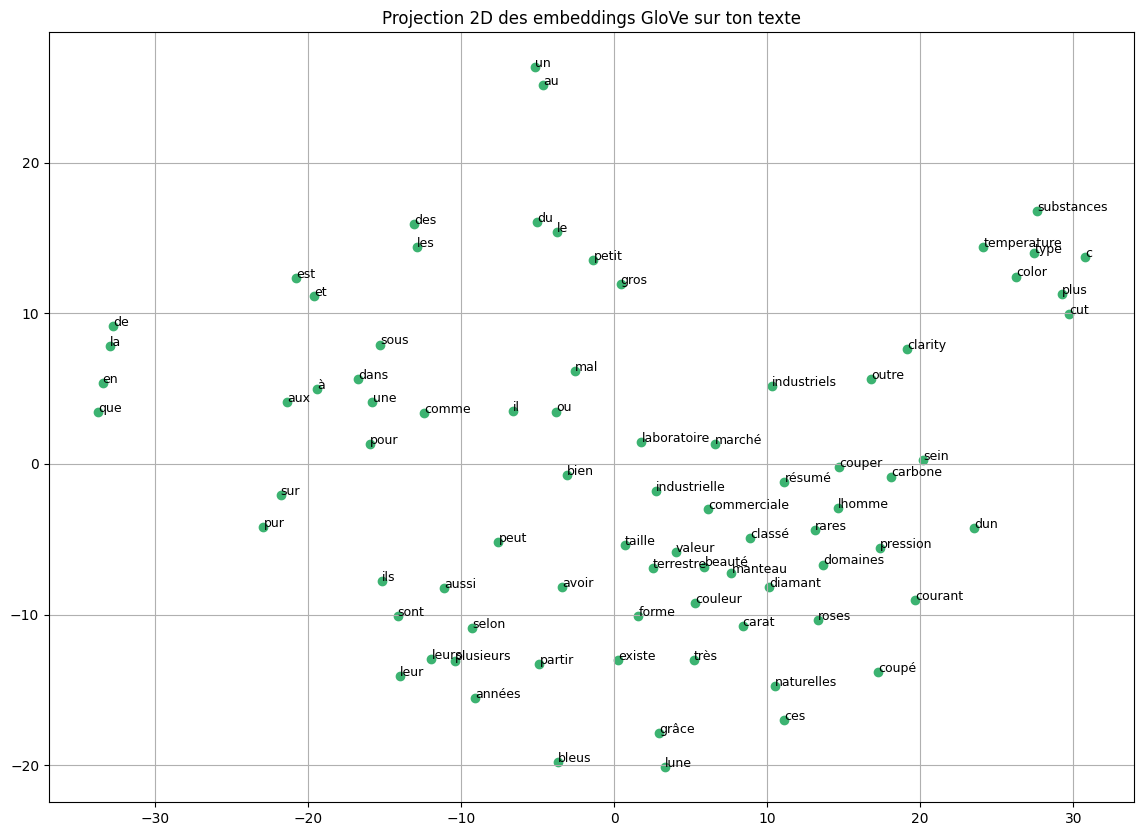

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
for i, word in enumerate(unique_words):
    x, y = word_coords_2d[i]
    plt.scatter(x, y, color='mediumseagreen')
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)
plt.title("Projection 2D des embeddings GloVe sur ton texte")
plt.grid(True)
plt.show()
